In [1]:
import pandas as pd

df = pd.read_csv('../results/sift-benchmark.csv')
df['method'] = 'top_block_range'



In [2]:
threshold_df = pd.read_csv('../results/sift-benchmark-threshold.csv')
threshold_df['method'] = 'threshold'

In [3]:
plot_df = pd.concat([df, threshold_df])

plot_df.head()

,query_time,recall,g_range,l_range,method,threshold
0,0.020452,0.2572,3,1.0,top_block_range,NaN
1,0.040461,0.3400,3,3.0,top_block_range,NaN
2,0.056097,0.3626,3,5.0,top_block_range,NaN
3,0.068281,0.3690,3,7.0,top_block_range,NaN
4,0.032387,0.3511,5,1.0,top_block_range,NaN


<Axes: xlabel='recall', ylabel='query_time'>

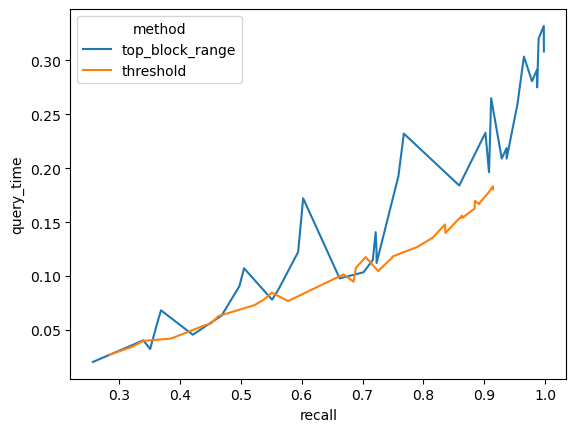

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(data=plot_df, x="recall", y="query_time", hue="method")

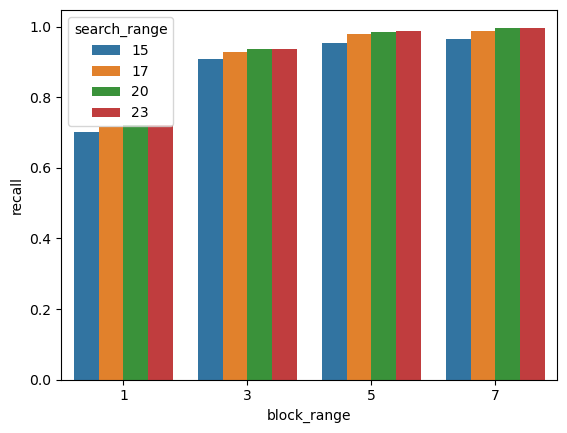

In [5]:
df["block_range"] = df["l_range"]
df["search_range"] = df["g_range"]
ax = sns.barplot(data=df.query('search_range > 13'), x="block_range", y="recall", hue="search_range")
ax.set(xlabel='block_range', ylabel='recall')
plt.show()

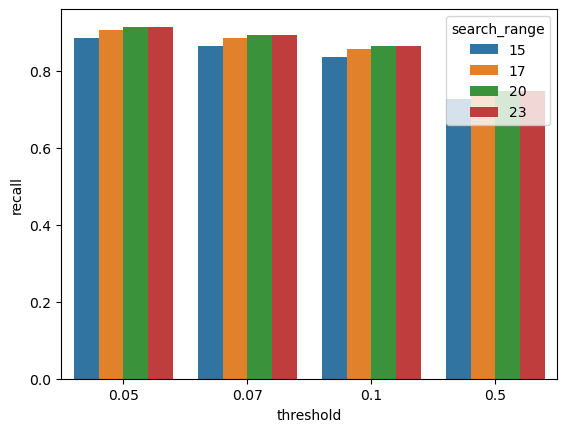

In [6]:
threshold_df["search_range"] = threshold_df["g_range"]
ax = sns.barplot(data=threshold_df.query('search_range > 13'), x="threshold", y="recall", hue="search_range")
ax.set( ylabel='recall')
plt.show()

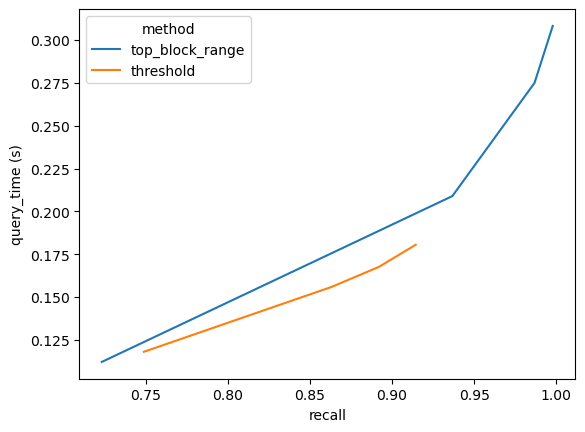

In [7]:
ax = sns.lineplot(data=plot_df.query('g_range == 23'), x="recall", y="query_time", hue="method")
ax.set( xlabel='recall', ylabel='query_time (s)')
plt.show()

In [8]:
plot_df.query('g_range == 23')

,query_time,recall,g_range,l_range,method,threshold
32,0.112156,0.7231,23,1.0,top_block_range,NaN
33,0.208920,0.9367,23,3.0,top_block_range,NaN
34,0.274983,0.9868,23,5.0,top_block_range,NaN
35,0.308237,0.9979,23,7.0,top_block_range,NaN
32,0.118059,0.7487,23,NaN,threshold,0.50
33,0.155986,0.8633,23,NaN,threshold,0.10
34,0.167638,0.8920,23,NaN,threshold,0.07
35,0.180534,0.9144,23,NaN,threshold,0.05
